## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [6]:
f = '../out.hdf5'
event_vars, m = h5load(f,'vars')

In [7]:
event_vars

,ntracks_track_down,ngood_fastjets_track_down,SUEP_genMass_track_down,SUEP_genPt_track_down,SUEP_nconst_CL_track_down,SUEP_pt_avg_b_CL_track_down,SUEP_S1_CL_track_down,SUEP_pt_avg_CL_track_down,SUEP_pt_CL_track_down,SUEP_eta_CL_track_down,...,SUEP_delta_mass_genMass_CL,SUEP_delta_pt_genPt_CL,ISR_nconst_CL,ISR_pt_avg_b_CL,ISR_S1_CL,ISR_pt_avg_CL,ISR_pt_CL,ISR_eta_CL,ISR_phi_CL,ISR_mass_CL
0,291,2,708.0,390.0,165.0,1.225350,0.811300,2.215658,306.934283,0.302770,...,-429.841741,-73.612811,90.0,2.389244,0.465007,4.259505,318.542623,0.377796,-3.041095,233.331590
1,242,2,948.0,334.0,136.0,1.673468,0.580739,2.735021,293.557033,-1.203553,...,-607.503212,-37.045274,67.0,2.214670,0.537998,5.345236,334.366842,-0.698152,0.686149,170.983745
2,296,2,798.0,600.0,199.0,1.130493,0.791406,2.181042,370.470588,0.824667,...,-482.739736,-224.260948,48.0,2.756537,0.338916,7.060567,310.764769,-0.689116,2.966043,169.907086
3,322,2,872.0,678.0,208.0,1.207714,0.850189,2.111251,361.332391,0.958346,...,-525.915289,-311.912500,61.0,2.834885,0.468744,7.193567,413.565385,0.009840,-2.658283,186.630884
4,13,1,1420.0,520.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,434,3,908.0,784.0,253.0,1.878329,0.531204,2.657607,462.298498,-0.560779,...,-221.957094,-301.714467,62.0,2.135028,0.400178,5.020130,285.015972,1.706138,-0.676484,211.484999
6,348,3,650.0,694.0,235.0,1.385431,0.850140,2.727751,562.127368,-1.240927,...,-239.771983,-121.401101,45.0,5.990077,0.171382,12.667372,504.882186,0.109833,-1.456395,299.777127
7,493,2,364.0,1264.0,471.0,1.089929,0.885986,8.034591,3749.427860,-0.520642,...,363.520565,2508.830167,15.0,1.908887,0.395928,50.327273,754.383459,0.425889,-2.118094,30.035567


In [8]:
for key in event_vars:
    if "PS" not in key: continue
    print(key)

PSWeight_ISR_up
PSWeight_ISR_down
PSWeight_FSR_up
PSWeight_FSR_down


In [8]:
event_vars['resnet_SUEP_pred_model126']

0    0.999991
1    1.000000
2    0.999988
3    0.999999
4    1.000000
Name: resnet_SUEP_pred_model126, dtype: float32

In [33]:
jets = event_vars['ngood_fastjets']
htloose = event_vars['ht_loose']
httight = event_vars['ht_tight']

(array([1.4600e+02, 0.0000e+00, 4.4440e+03, 0.0000e+00, 3.6554e+04,
        0.0000e+00, 2.6530e+03, 0.0000e+00, 7.7000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

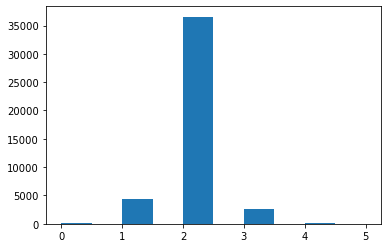

In [34]:
plt.hist(jets)

64909205.15625
64774388.28125


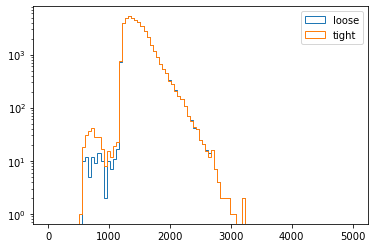

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))